In [6]:
import networkx as nx
import pandas as pd

In [7]:
!wget https://raw.githubusercontent.com/AnnaMoy/Data-620/refs/heads/main/roadNet-CA.txt

--2025-09-15 23:42:14--  https://raw.githubusercontent.com/AnnaMoy/Data-620/refs/heads/main/roadNet-CA.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82254007 (78M) [text/plain]
Saving to: ‘roadNet-CA.txt.1’

roadNet-CA.txt.1    100%[===================>]  78.44M   374MB/s    in 0.2s    

2025-09-15 23:42:15 (374 MB/s) - ‘roadNet-CA.txt.1’ saved [82254007/82254007]



In [8]:
# url to represent the txt file
url = 'https://raw.githubusercontent.com/AnnaMoy/Data-620/refs/heads/main/roadNet-CA.txt'

# read the txt file
df = pd.read_csv(url, sep='\t', comment='#', names=['FromNodeId', 'ToNodeId'])

# Create an undirected graph from the DataFrame
G = nx.from_pandas_edgelist(df, source='FromNodeId', target='ToNodeId')

# Get number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# show the first 5 rows
print(df.head())

# show the dimension of the data frame
df.shape

Number of nodes: 1965206
Number of edges: 2766607
   FromNodeId  ToNodeId
0           0         1
1           0         2
2           0       469
3           1         0
4           1         6


(5533214, 2)

In [5]:
# Load the CA Road Dataset with a directed graph and node type is an interger
# Directed graph are typically used for road network since we travel from point A to point B and not B to A.
g = nx.read_edgelist('roadNet-CA.txt',create_using = nx.DiGraph(), nodetype = int)


In [9]:
# Convert to undirected (diameter and clustering coefficient)
# Need to convert it back to undirected to be able to reach all the different nodes
g_undirected = g.to_undirected()

# Find and extract the largest connected component
largest_cc = max(nx.connected_components(g_undirected), key=len)

# Make a smaller network out of the largest group
g_lcc = g_undirected.subgraph(largest_cc).copy()

# Take a smaller network which includes the first 1000 points from the group
small_graph = nx.subgraph(g_lcc, list(g_lcc.nodes)[:1000])

In [10]:
# Approximate diameter using eccentricity
# Graph diameter is the largest number of vertices that must transversed in order to travel from one vertex to another
from networkx.algorithms.approximation import diameter

# Calculate the diameter and print results
approx_diameter = diameter(g_lcc)
print("Approximate Diameter:", approx_diameter)

Approximate Diameter: 857


In [11]:
# Calculate the average clustering coefficient and print results
clustering = nx.average_clustering(small_graph)
print("Average Clustering Coefficient:", clustering)

Average Clustering Coefficient: 0.09213333333333333


In [12]:
nx.write_gexf(small_graph, "roadNet_CA_sampled.gexf")

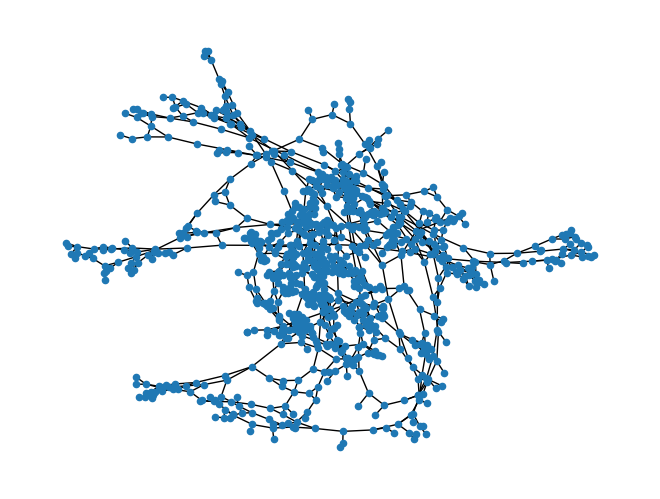

In [13]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(small_graph)
nx.draw(small_graph, pos, node_size=20, with_labels=False)
plt.show()
